In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
path = "Chess_Board.png" 
image = cv2.imread(path)

In [3]:
# Check image's shape
image.shape  # its result is the number of time a kernel needs to scan through the image 

(600, 600, 3)

In [4]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

<function matplotlib.pyplot.show(close=None, block=None)>

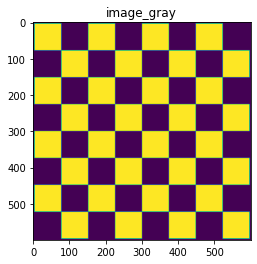

In [5]:
plt.imshow(image_gray)
plt.title("image_gray")
plt.show

In [6]:
gray_float = np.float32(image_gray)
corners_image = cv2.cornerHarris(gray_float, 3, 3, 0.04)

<function matplotlib.pyplot.show(close=None, block=None)>

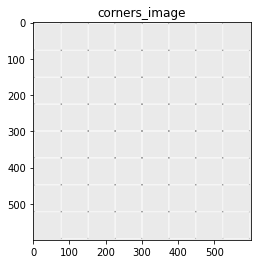

In [7]:
plt.imshow(corners_image, cmap = "Greys")
plt.title("corners_image")
plt.show

In [8]:
np.max(corners_image)

394636740.0

In [9]:
np.min(corners_image)

-75168900.0

In [10]:
# Use threshold to highlight the corners 

_, corners_image_with_threshold = cv2.threshold(corners_image, 0, 255, cv2.THRESH_BINARY)

<function matplotlib.pyplot.show(close=None, block=None)>

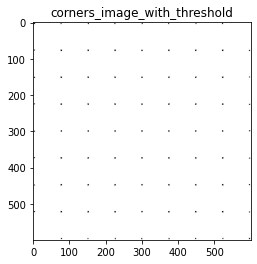

In [11]:
plt.imshow(corners_image_with_threshold, cmap = "Greys")
plt.title("corners_image_with_threshold")
plt.show

In [12]:
# Make an empty Matrix as Harris Matrix
# Yield 4 dimensions as 2x2 matrix of a single pixel times 600x600 matrix of the image

# gradients_matrix = np.zeros((2, 2, 600, 600)) # as shown on image.shape << (600, 600, 3)
gradients_matrix = np.zeros((2, 2, *image_gray.shape))

In [13]:
gradients_matrix.shape

(2, 2, 600, 600)

In [14]:
gradients_matrix.dtype

dtype('float64')

In [15]:
x_kernel = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1],]).astype(np.float32)

In [16]:
y_kernel = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1],]).astype(np.float32)

In [17]:
image_with_x_kernel = cv2.filter2D(gray_float, -1, x_kernel)
image_with_y_kernel = cv2.filter2D(gray_float, -1, y_kernel)

<function matplotlib.pyplot.show(close=None, block=None)>

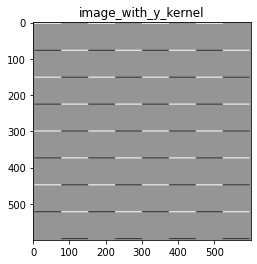

In [18]:
plt.imshow(image_with_y_kernel, cmap="Greys")
plt.title("image_with_y_kernel")
plt.show

In [19]:
# Harris Matrix

gradients_matrix[0][0] = image_with_x_kernel**2
gradients_matrix[0][1] = image_with_x_kernel*image_with_y_kernel
gradients_matrix[1][0] = image_with_x_kernel*image_with_y_kernel
gradients_matrix[1][1] = image_with_y_kernel**2

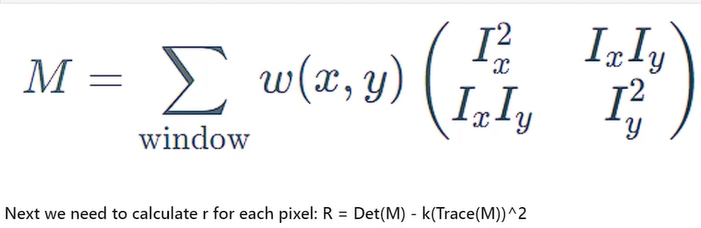

In [20]:
gradients_matrix.shape

(2, 2, 600, 600)

In [21]:
gradients_last_matrix = np.moveaxis(gradients_matrix,[1,0],[-2,-1])
gradients_last_matrix.shape

(600, 600, 2, 2)

In [22]:
# Left-upper corner
gradients_last_matrix[0][0]

array([[0., 0.],
       [0., 0.]])

In [23]:
gradients_last_matrix[300][300]

array([[260100., 260100.],
       [260100., 260100.]])

In [24]:
k = 0.04
r_of_image = np.zeros((image_gray.shape))

In [25]:
r_of_image.shape

(600, 600)

In [26]:
np.min(r_of_image)

0.0

In [27]:
np.max(r_of_image)

0.0

In [28]:
#for i in range(r_of_image.shape[0]):
#    for u in range(r_of_image.shape[1]):
#        r_of_image[i][u] = np.linalg.det(gradients_last_matrix[i][u])-k*(np.trace(gradients_last_matrix[i][u]))**2 #linear algbra

In [29]:
for i in range(1,r_of_image.shape[0]-1):
    for u in range(1,r_of_image.shape[1]-1):
        m = np.sum(gradients_last_matrix[i-1:i+1,u-1:u+1], axis=(0,1))
        r_of_image[i][u] = np.linalg.det(m)-k*(np.trace(m))**2 

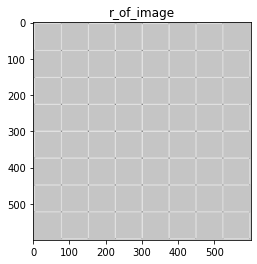

In [30]:
plt.imshow(r_of_image, cmap='Greys')
plt.title('r_of_image')
plt.show()

In [31]:
_, r_of_image_with_threshold = cv2.threshold(r_of_image, 10, 255, cv2.THRESH_BINARY)

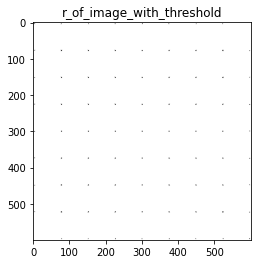

In [32]:
plt.imshow(r_of_image_with_threshold, cmap='Greys')
plt.title('r_of_image_with_threshold')
plt.show()

In [33]:
cv2.imwrite('r_of_image.jpg',r_of_image_with_threshold)

True

In [36]:
np.max(r_of_image_with_threshold)

255.0